# Computer vision - Laboratory

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing
2. Edge detection

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 Image processing with different scales and filters

a) Read the image "face.png" and analyse its histogram. What is the histogram representing for an image?

- Visualize the R, G, and B channels of the image.

- Visualize the histogram of a color image with the following characteristics:

    - Obtain the histogram with 8, 32, 64 and 256 bins. 

    - Visualize the histogram of each channel and the gray level image and compare them. Comment their difference (see image bellow as an example of histogram extraction).

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

In [1]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from skimage import exposure, img_as_float, transform, filters, feature
from scipy import ndimage
from skimage.color import rgb2gray,rgba2rgb
from skimage.color.adapt_rgb import adapt_rgb, each_channel
from skimage.transform import resize
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
import matplotlib.animation as FuncAnimation
%matplotlib inline

In [2]:
"""
This first function allow us to display a subplot with different images

:param titles: list of the titles of each image
:param images: list of each image
:param nrows, ncolumns: number of rows and number of columns of the subplot
:return: in case of out of range
"""

def plotter(images=[],titles=[],gray=[],rows=0,cols=0):
    
    if (rows*cols) < (len(images)): #We must check if we have one cell per image
        print("Attention! The dimensions of the subplot are incorrect!")
        return
    
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 5)) #Create the subplot

    count = 0 #Index of both arrays (titles and images)
    total = len(images)
    
    for i in range(rows): #Iterate over the subplot
        for j in range(cols):
            if count<total:
                if rows == 1 and cols == 1:
                    im = axs
                elif rows==1:
                    im = axs[j]
                else:
                    im = axs[i,j]
                im.axis('off') # remove the axis values
                im.set_title(titles[count]) #Set the title
                if gray[count]:
                    im.imshow(images[count],cmap='gray')
                else:
                    im.imshow(images[count])
                
            else:
                im = axs[i,j]
                im.axis('off')
            count += 1
            
    plt.show() #Finally display the subplot

In [3]:
"""
plot_color_histogram display a coloured histogram divided by nbins

:param title: The title of the histogram
:param image: The image we want to analyze
:param nbins: represents the number of 'sections' we want to distribute the intensities 
              of the pixels (rgb and gray) on every channel of the image
"""
def plot_color_histogram(title, image, nbins=8, grayImage=False): #By default nbins = 8
    if not grayImage:
        grayimage = rgb2gray(image) #We want to pick the grayscale intensities of the image

        if(type(image) != 'float64'): #We need to normalize all the values of the images...
            image = image/255

        images=[grayimage, image[:,:,0], image[:,:,1], image[:,:,2]] #All the matrix are float64 type now 
                                                                     #so that we can spread its values in nbins sections
        hist_values = []
        
        for img in images: #Now we need to normalize the matrix in order to check the intensities between 0 and nbins
            hist_values.append(((float(nbins)*img)).ravel()) #ravel its used to flat the array 
                                                             #(turn the 2d array to 1d array)
        plt.figure(figsize=(10, 3)) 
        
        #Plot the histogram with the calculated values, setting the labels and the colors
        plt.hist(hist_values, bins=nbins,label=['Gray','Red channel','Green channel','Blue channel'],color=['yellow','red','green','blue'], range=(0, nbins))
        plt.legend(loc='best') #Set the labels cell on the histogram graphic
        plt.title(title)
        plt.show()
        
    else:
        plt.hist(((float(nbins)*image)).ravel(), bins=nbins, label=['Gray'], color=['gray'], range=(0,nbins))
        plt.legend(loc='best')
        plt.title(title)
        plt.show()

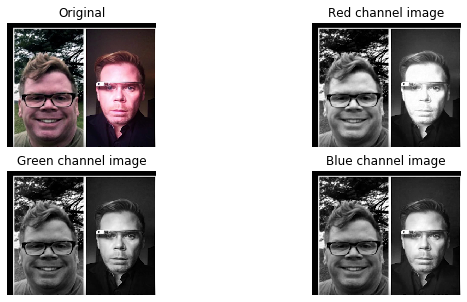

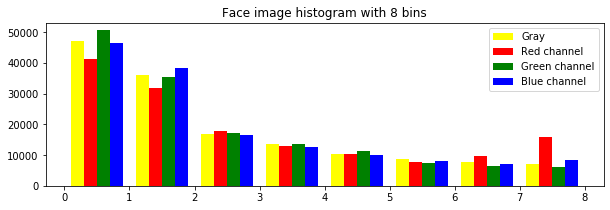

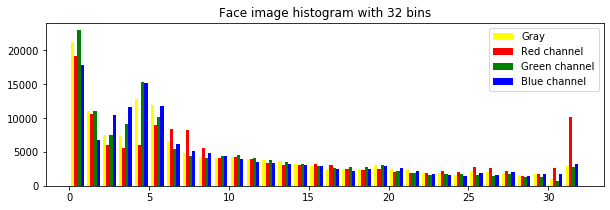

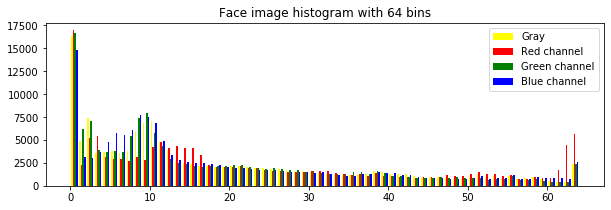

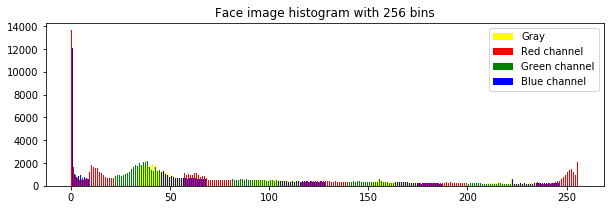

In [4]:
face = io.imread('images/face.png') #Load the image

#Extracting 3 channels of the image
rchannel = face[:,:,0]
gchannel = face[:,:,1]
bchannel = face[:,:,2]

#Arrays of the images and the titles
ar_img1 = [face,rchannel,gchannel,bchannel]
ar_titl1 = ['Original','Red channel image','Green channel image','Blue channel image']

#Making the subplot with the images and displaying it
plotter(images=ar_img1,titles=ar_titl1,\
        gray=[False,True,True,True],rows=2,cols=2)

#Displaying the 8, 32, 64 and 256 bins histograms
plot_color_histogram("Face image histogram with 8 bins",face,8)
plot_color_histogram("Face image histogram with 32 bins",face,32)
plot_color_histogram("Face image histogram with 64 bins",face,64)
plot_color_histogram("Face image histogram with 256 bins",face,256)

### Answering the questions

First of all we need to know that the histogram of an image represents. On the 'x' edge we have the diferent intensities of the rgb channels and the grayscale level on the image, equally distributed in nbins sections. On the 'y' edge we have the number of pixels. So the histogram of an image is a graphic where we can analyze the quantity of pixels that every color intensity has on the whole image. 

If we want to compare the graphics made with different nbins, we can see that all the histograms have in common that there are so many pixels situated on the lowest range of intensity. Also we can see that the color red has so many pixels that are situated on a big intensity (at the final range of the histogram). 

Finally we can represent a histogram taking images with any types of numbers; float or integer. In our case, we transform our initial image on a grayscale image (to analyze the grayscale levels) which has type float by using rgb2gray function. So if the values of the initial image are type uint8 we wanted to transform into a float64. In that conditions we can normalize all the images to equally classify all the values in nbins.

b) Read the image `face.png` (a) and convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]`(b). Later, substract the obtained image to the original one and save the new image (c). 

***To make your code legible, the resulted images should be shown in a 3x1 plot, with the following titles: a) 'Original image', b) 'Convolved image' and c) 'Difference with the original image'***

Hint: the `convolve` command belongs to the library `ndimage` of `scipy`. 

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Plot the different images ((a)original image, (b)intermediate and (c)final) on a figure with multiple images. Put titles on the image plots to explain what each image represents. Is the type of the mask important for the convolution? How is the image changed after the convolution? You need to repeat several times the convolution. Moreover, you need to also use bigger masks in order to observe better the effect of it. Present at least 5 experiments commenting the results obtained and their differences.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


   --------------------------------------- Reescaling intensities --------------------------------------


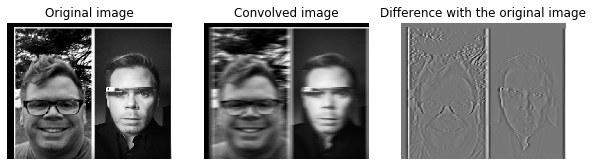

   ----------------------------------- Without reescaling the intensities ------------------------------


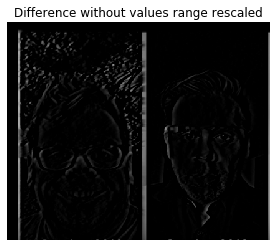

   -------------------------------------------------- DATA ------------------------------------------------
   Grayscale image type:  float64  Maximum and minimum values on the image :  1.0 , 0.0
   Convolved image type:  float64  Maximum and minimum values on the image :  0.9956992941176471 , 0.0
   Substracted image type:  float64  Maximum and minimum values on the image :  0.7699155032679739 , -0.6722078954248366
   --------------------------------------------------------------------------------------------------------


In [9]:
im = io.imread("images/face.png") #First load the image... 
mask_h1d = np.ones(shape=(1,15)) #Generate the horizontal mask 

im = rgb2gray(im)#Convert the image to a grayscale image -> (a)

mask_h1d = mask_h1d/np.sum(mask_h1d) #We want to normalize the matrix to have values from 0 to 1

im2 = ndimage.convolve(im,mask_h1d)

io.imsave("images/face_convolve.png",im2)

diff = im - im2 #that's the difference between both two images

print("   --------------------------------------- Reescaling intensities --------------------------------------")

plotter(images=[im,im2,diff],titles=["Original image","Convolved image","Difference with the original image"],\
        gray=[True,True,True],rows=1,cols=3)
plt.imshow(diff,cmap = 'gray',vmin=0,vmax=1)

print("   ----------------------------------- Without reescaling the intensities ------------------------------")
plt.title('Difference without values range rescaled')
plt.axis('off')
plt.show()
print("   -------------------------------------------------- DATA ------------------------------------------------")
print("   Grayscale image type: ", im.dtype, " Maximum and minimum values on the image : ", np.max(im),",", np.min(im))
print("   Convolved image type: ", im2.dtype, " Maximum and minimum values on the image : ", np.max(im2),",", np.min(im2))
print("   Substracted image type: ", diff.dtype, " Maximum and minimum values on the image : ", np.max(diff),",", np.min(diff))
print("   --------------------------------------------------------------------------------------------------------")

### Answering the questions

The type of the mask will be important because we want to apply the horizontal mask to the grayscale image which is float64 type. Also the convolved image values sould be between 0 and 1 to not alterate its brightness, so in order to do this, we have to normalize the convolved image or directly the mask. 

Once we apply the mask the image change with a directional blurry effect. If we repeat the convolution for a different mask we obtain the following results:

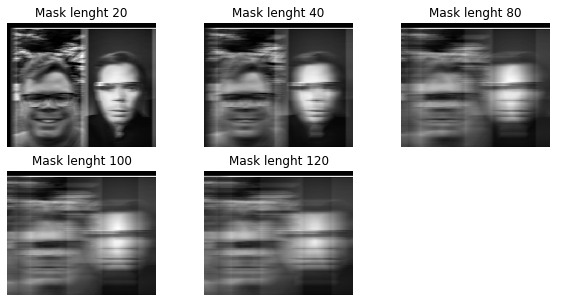

In [10]:
face3 = io.imread('images/face.png')
face_gray2 = rgb2gray(face3)

#Generate 5 different masks with different values...
mask_h1d2 = np.array([20*[float(1/20)]]) #We are directly normalizing each matrix
mask_h1d3 = np.array([40*[float(1/40)]])
mask_h1d4 = np.array([80*[float(1/80)]])
mask_h1d5 = np.array([100*[float(1/100)]])
mask_h1d6 = np.array([120*[float(1/120)]])

#Convolving the images
conv = ndimage.convolve(face_gray2,mask_h1d2)
conv2 = ndimage.convolve(face_gray2,mask_h1d3)
conv3 = ndimage.convolve(face_gray2,mask_h1d4)
conv4 = ndimage.convolve(face_gray2,mask_h1d5)
conv5 = ndimage.convolve(face_gray2,mask_h1d6)

ar_titl3 = ["Mask lenght 20", "Mask lenght 40", "Mask lenght 80", "Mask lenght 100", "Mask lenght 120"]
ar_img3 = [conv, conv2, conv3, conv4, conv5]

#Displaying them in a subplot without reescaling its intensities
plotter(images=[conv,conv2,conv3,conv4,conv5],titles=["Mask lenght 20", "Mask lenght 40", "Mask lenght 80", "Mask lenght 100", "Mask lenght 120"],\
        gray=[True,True,True,True,True],rows=2,cols=3)

As we can see, if the mask lenght increases, the convolution gets more strengh and the blurry effect too.

c) Convolve the image with a vertical one-dimensional mask. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

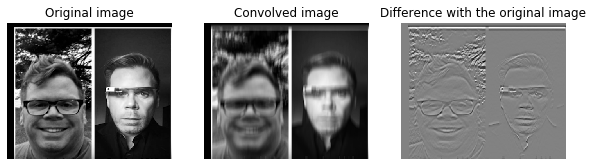

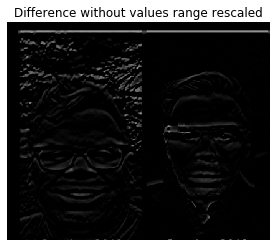

   --------------------------------------------------------------------------------------------------------


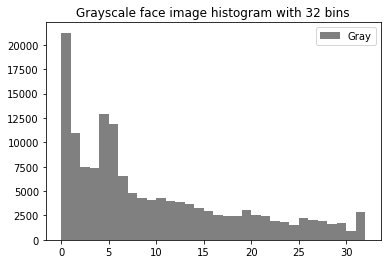

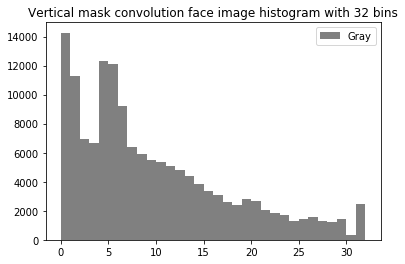

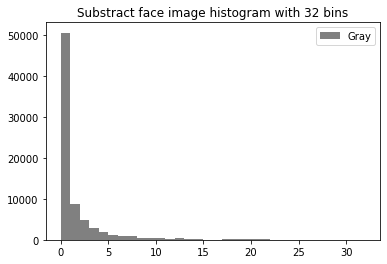

In [11]:
im = io.imread("images/face.png") #First load the image... 
mask_h1d = np.ones(shape=(15,1)) #Generate the vertical mask 
im = rgb2gray(im) #Convert the image to a grayscale image -> (a)

mask_h1d = mask_h1d/np.sum(mask_h1d) #Normalize the mask

#Now we can convolve the image with ndimage.convolve function
im2 = ndimage.convolve(im,mask_h1d) # -> (b)

#Finally we only need to substract the convolved image with the original one 
diff = im - im2 # -> (c)

plotter(images=[im,im2,diff],titles=["Original image","Convolved image","Difference with the original image"],\
        gray=[True,True,True],rows=1,cols=3)

plt.imshow(diff,cmap = 'gray',vmin=0,vmax=1)
plt.title('Difference without values range rescaled')
plt.axis('off')
plt.show()

print("   --------------------------------------------------------------------------------------------------------")
plot_color_histogram("Grayscale face image histogram with 32 bins",im,nbins=32,grayImage=True)
plot_color_histogram("Vertical mask convolution face image histogram with 32 bins",im2,nbins=32,grayImage=True)
plot_color_histogram("Substract face image histogram with 32 bins",diff,nbins=32,grayImage=True)

### Answering the questions

We can see that with a vertical mask the direction of the blurry effect change from horizontal to vertical.

d) Convolve the original image with a uniform `two-dimensional` mask of dimensions 15x15 and with all values set to 1. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

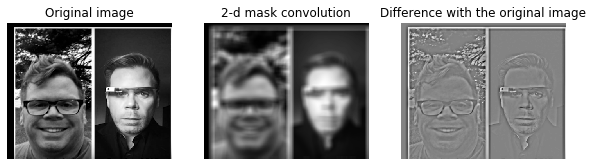

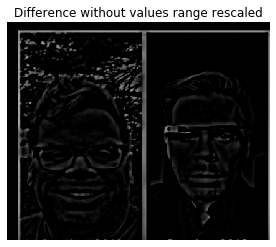

   --------------------------------------------------------------------------------------------------------


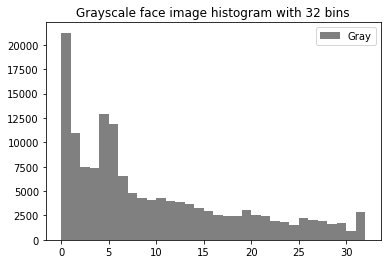

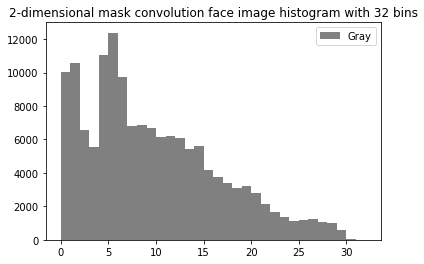

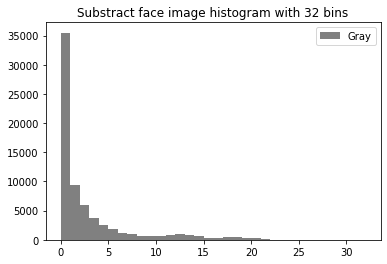

In [12]:
im = io.imread("images/face.png") #First load the image... 
mask_h2d = np.ones(shape=(15,15)) #Generate the 2d mask
                                                               
im = rgb2gray(im) #Convert the image to a grayscale image -> (a)

mask_h2d = mask_h2d/np.sum(mask_h2d) #Normalize the mask

#Now we can convolve the image with ndimage.convolve function
im2 = ndimage.convolve(im,mask_h2d) # -> (b)

#Finally we only need to substract the convolved image with the original one 
diff = im-im2 # -> (c)

#Display the images...
plotter(images=[im,im2,diff],titles=["Original image","2-d mask convolution","Difference with the original image"],\
        gray=[True,True,True],rows=1,cols=3)

plt.imshow(diff,cmap = 'gray',vmin=0,vmax=1)
plt.title('Difference without values range rescaled')
plt.axis('off')
plt.show()

print("   --------------------------------------------------------------------------------------------------------")
plot_color_histogram("Grayscale face image histogram with 32 bins",im,nbins=32,grayImage=True)
plot_color_histogram("2-dimensional mask convolution face image histogram with 32 bins",im2,nbins=32,grayImage=True)
plot_color_histogram("Substract face image histogram with 32 bins",diff,nbins=32,grayImage=True)

### Answering the questions

On one hand we have that the levels of gray on the images did not change. On the other hand the 2 dimensional mask (the two anterior masks; vertical and horizontal, at the same time) apply some effect of smoothing on the image instead of the blurry directional effect.

e) Can we convolve a color image? 

Implement a 3-channel filter, apply it, visualize the 3 images (a, b and c) and comment the results obtained.

Which is the result obtained when applying a single-channel filter channel by channel separately? Visualize again the three images (original, convolved and difference) and compare the results.

In [13]:
"""
If we want to implement a 3-channel filter we will have to use adapt_rgb decorator. 
Also we will take each_channel handler which pass each of the RGB channels to the filter 
one-by-one, and stitch the results back into an RGB image.
"""
@adapt_rgb(each_channel)
def rgb_image_convolution(image, mask):
    return ndimage.convolve(image, mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


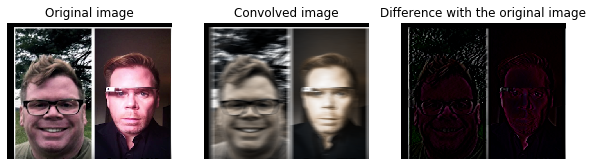

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


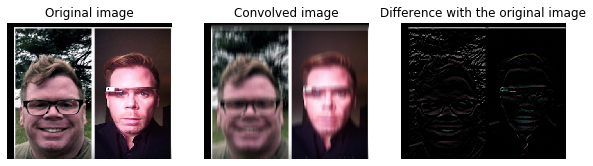

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


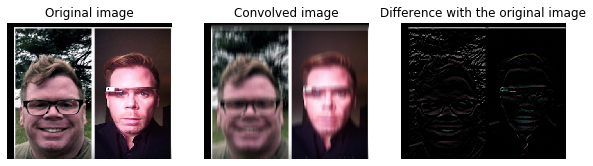

In [14]:
im = io.imread("images/face.png") #First load the image...

"""
We will use 3 methods in order to apply the convolution to an rgb image
"""

#First method. Apply a horizontal mask but with 3 dimensional array
im = rgba2rgb(im) #Get the rgb image

mask_h1d_3channel = np.ones(shape=(1,15,3)) #Generate the mask and then normalize
mask_h1d_3channel = mask_h1d_3channel/np.sum(mask_h1d_3channel)

#Get the convolved image and then the difference
im_convolve_3channel = ndimage.convolve(im,mask_h1d_3channel)
im_difference_3channel = im-im_convolve_3channel

#Display the images...
plotter(images=[im,im_convolve_3channel,im_difference_3channel],titles=["Original image","Convolved image","Difference with the original image"],\
        gray=[False, False, False],rows=1,cols=3)


#Second method. Now we will convolve the image separately
im2 = im.copy()

#for each channel we make the convolution
im2[:,:,0] = ndimage.convolve(im[:,:,0],mask_h1d)
im2[:,:,1] = ndimage.convolve(im[:,:,1],mask_h1d)
im2[:,:,2] = ndimage.convolve(im[:,:,2],mask_h1d)

diff = im.copy()

#we separetly make the difference of every channel
diff[:,:,0] -= im2[:,:,0]
diff[:,:,1] -= im2[:,:,1]
diff[:,:,2] -= im2[:,:,2]

#Display the images...
plotter(images=[im,im2,diff],titles=["Original image","Convolved image","Difference with the original image"],\
        gray=[False, False, False],rows=1,cols=3)

#And the third method is the faster one. Using the rgb_image_convolution
rgbImgConvFilter = rgb_image_convolution(im,mask_h1d)
im_difference_3channel2 = im-rgbImgConvFilter

plotter(images=[im,rgbImgConvFilter,im_difference_3channel2],titles=["Original image","Convolved image","Difference with the original image"],\
        gray=[False, False, False],rows=1,cols=3)

### Answering the questions

The important thing in this exercice is to see the use of a 3-channel filter without have to decompose the image on its 3 channels and make the convolution one by one. The code above show us that make this two actions (use a 3-channel filter and extract the 3 rgb channels) is the same at the time to make a convolve rgb image.

Given a color image (im), what is the difference between ***a*** and ***b*** ?
   
*** a) ***

im_2=np.array(im, dtype='float')


*** b) ***

im_2=np.array(im)


im_2=img_as_float(im_2)

In [15]:
im = io.imread("images/doulphin.jpg") #Load a color (rgb) image
im_2 = np.array(im,dtype='float') #It converts the values to type float but dont change any of them

#Here we make a conversion to float but in addition we are reescaling all its values to keep them between 0 and 1
im_2 = np.array(im)
im_2=img_as_float(im_2)

### Anwering the questions

As we have commented on the code cell above, when we are loading the image into an array but declaring its atribute 'dtype' as a float, we are converting the values to type float but we are not changing any of the values. However when we call img_as_float function we are making a conversion to float and also reescaling all the values of the coloured image bewtween 0 and 1.

f) Change the size of the image a) reducing it 10 times ***and*** b) augmenting it two times. 

Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why. 

Apply the convolution on the three images with the same two dimensional uniform mask and comment the results.
Note: Observe what is the output of the command `resize`.


/Users/marcosplazagonzalez/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


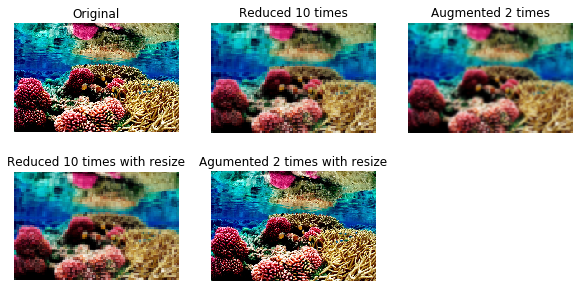

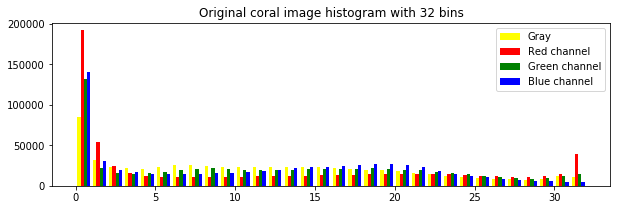

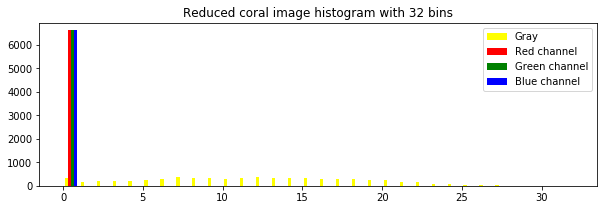

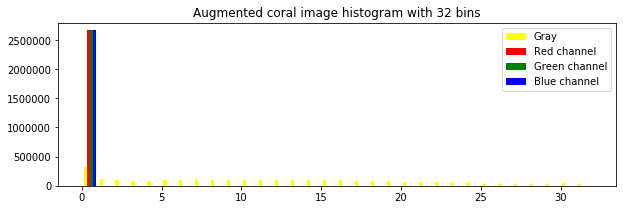

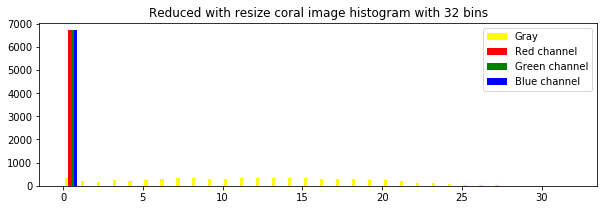

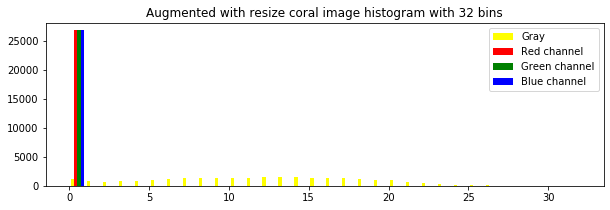

   --------------------------------------------------------------------------------------------------------


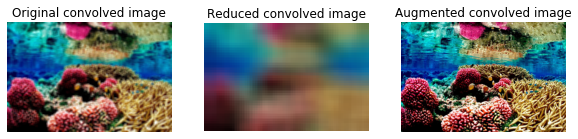

In [16]:
corals = io.imread('images/corals.jpg')

# With resize command
im_resize_up = resize(corals,(corals.shape[0]*2,corals.shape[1]*2)) #Augmenting two times the size of the image
im_resize = resize(corals,(int(corals.shape[0]/10),int(corals.shape[1]/10))) #Reducing by 10 the size of the image

#With rescale command
im_rescale_down = transform.rescale(corals,0.1)
im_rescale_up = transform.rescale(im_rescale_down,2)

plotter(images=[corals,im_rescale_down,im_rescale_up,im_resize,im_resize_up], \
        titles=["Original","Reduced 10 times", "Augmented 2 times", "Reduced 10 times with resize","Agumented 2 times with resize"],gray=[False, False, False, False,False],rows=2,cols=3)

plot_color_histogram("Original coral image histogram with 32 bins",corals,nbins=32)
plot_color_histogram("Reduced coral image histogram with 32 bins",im_resize,nbins=32)
plot_color_histogram("Augmented coral image histogram with 32 bins",im_resize_up,nbins=32)
plot_color_histogram("Reduced with resize coral image histogram with 32 bins",im_rescale_down,nbins=32)
plot_color_histogram("Augmented with resize coral image histogram with 32 bins",im_rescale_up,nbins=32)

mask_2d_3 = np.array([15*[float(1/(15*15))] for i in range(15)]) #Generate the 2d mask and directly normalize the mask
                                                                 #instead of normalizing the image
#Convolve all 3 images using rgb_image_convolution
conv_coral = rgb_image_convolution(corals,mask_2d_3)
conv_max = rgb_image_convolution(im_resize_up,mask_2d_3)
conv_min = rgb_image_convolution(im_resize,mask_2d_3)

print("   --------------------------------------------------------------------------------------------------------")

arr_titles2 = ["Original convolved image", "Reduced convolved image", "Augmented convolved image"]
arr_images2 = [conv_coral, conv_min, conv_max]

#Display the images
plotter(images=[conv_coral,conv_min,conv_max], \
        titles=["Original convolved image", "Reduced convolved image", "Augmented convolved image"],gray=[False, False, False],rows=1,cols=3)

### Answering the questions

First of all we can see that using resize we are getting images which the majority of its values are very little. At the histograms we can se that all medium and high intensities of its colors have dissappeared because of using this resize function.

We can see that, if we are resizing an image into another one bigger, the smoothing effect will have a less impact over the image. In other situations, when the image is resizing into another littler, the smoothing effect of the mask increases.

#### 2.2 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the original image of the previous exercise:

- Gaussian kernel with sigma = 1
- Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
- Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: use the skimage.filters function for creating the different filters.

In [17]:
"""
We will repeat the anterior formula but this time to apply a median filter
"""
@adapt_rgb(each_channel)
def median_filter(image):
    return filters.median(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


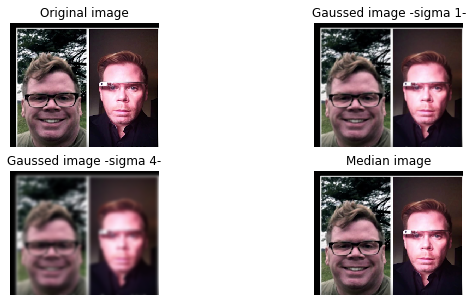

In [18]:
face = io.imread('images/face.png') #Load the image...

arr_face = []
_arr_titles = ["Gaussian filter sigma=1", "Gaussian filter sigma=4", "Median filter"]

#First we will use a gaussian filter with sigma equals to 1
sigma_1 = filters.gaussian(face, 1, multichannel=True) #We are in a rgb channel
arr_face.append(sigma_1)

#Now we apply a gaussian filter with a different sigma value
sigma_4 = filters.gaussian(face, 4, multichannel=True)
arr_face.append(sigma_4)

#To finalize we have to apply the median filter
median_filtR = median_filter(face)
arr_face.append(median_filtR)

#Display images...
plotter(images=[face,sigma_1,sigma_4,median_filtR], \
        titles=["Original image","Gaussed image -sigma 1-","Gaussed image -sigma 4-", "Median image"],\
        gray=[False, False,False,True],rows=2,cols=2)

### Answering the questions

First of all we've applied the gaussian filter with sigma = 1 which apply to an image a light smoothing. If we look at the median filter image the effect is almost the same. Both of them are studyed on class of theory, and both of them can be used to eliminate noise. But if we increase the sigma of the gaussian filter, the burr effect increases and with this, we are losing information of the image.

**(Optional)** Apply the smoothing on some other images and present their results.

### 2.3 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session (roberts, prewitt, sobel and canny). Also, find the optimal parameteres for each of them.

Use subplot and title to visualize the results.

Which is the best countour detection technique? 

Which are the optimal parameters for this image? 

Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

Hint: use skimage.feature.canny for applying the canny filter

Optional: Superimpose the contours over the image.

In [19]:
def prewitt(im):
    im = rgb2gray(im)
    
    #mask to get the vertical contourns
    prewitt_maskV = np.zeros((3,3))
    prewitt_maskV[0,:] = 1
    prewitt_maskV[2,:] =-1

    im_prewittV = ndimage.convolve(im,prewitt_maskV)

    #mask to get the horitzontal contourns
    prewitt_maskH = np.zeros((3,3))
    prewitt_maskH[:,0] = 1
    prewitt_maskH[:,2] =-1

    im_prewittH = ndimage.convolve(im,prewitt_maskH)    
    
    return im_prewittV,im_prewittH    

In [20]:
def sobel(im):
    im = rgb2gray(im)
    #mask to get the vertical contourns
    sobel_maskV = np.zeros((3,3))
    sobel_maskV[0,:] = 1
    sobel_maskV[0,1] = 2
    sobel_maskV[2,:] =-1
    sobel_maskV[2,1] =-2

    im_sobelV = ndimage.convolve(im,sobel_maskV)

    #mask to get the horitzontal contourns
    sobel_maskH = np.zeros((3,3))
    sobel_maskH[:,0] = 1
    sobel_maskH[1,0] = 2
    sobel_maskH[:,2] =-1
    sobel_maskH[1,2] =-2

    im_sobelH = ndimage.convolve(im,sobel_maskH)
    
    return im_sobelV,im_sobelH

In [21]:
def canny(im,sigma=1):
    im = rgb2gray(im)
    im_canny = feature.canny(im,sigma)
    return im_canny

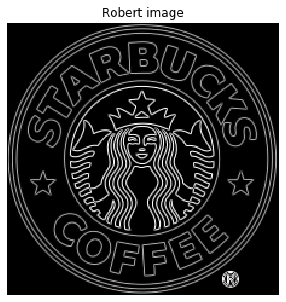

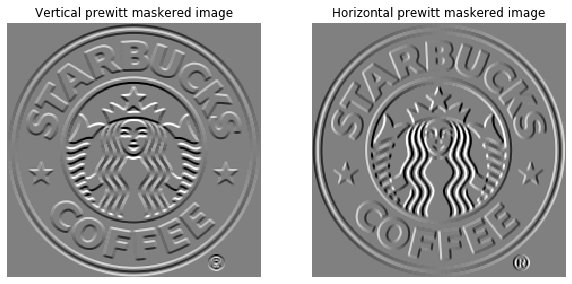

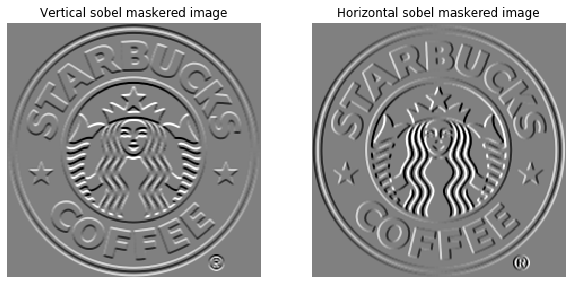

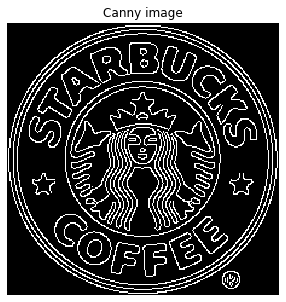

In [22]:
im = io.imread('images/logo.png')
im = rgb2gray(im)

im_roberts = filters.roberts(im) # -> Roberts
im_prewittV,im_prewittH = prewitt(im)
im_sobelV,im_sobelH = sobel(im)
im_canny = canny(im)

plotter(images=[im_roberts],titles=["Robert image"], gray=[True],rows = 1, cols = 1)

plotter(images=[im_prewittV,im_prewittH],titles=["Vertical prewitt maskered image","Horizontal prewitt maskered image"],\
           gray=[True,True],rows=1,cols=2)

plotter(images=[im_sobelV,im_sobelH],titles=["Vertical sobel maskered image","Horizontal sobel maskered image"],\
       gray=[True,True],rows=1,cols=2)

plotter(images=[im_canny],titles=["Canny image"], gray=[True],rows = 1, cols = 1)


### Answering the questions

Both of us, we think that Sobel and Prewitt are the best contour detecting tecniques because the resolution and the definition of the images.

Only we can to enter the sigma on the canny detector, and the best sigma for it in this case is probably near to 0, because if we put 4 by example, the contours are not defined as we can see down this cell.

Is not necessary to normalize the kernel to convolve the image. We usually normalize it to ensure that the average pixel in the modified image is as bright as the average pixel in the original one, but in this case we want to make the border pixels brigther 

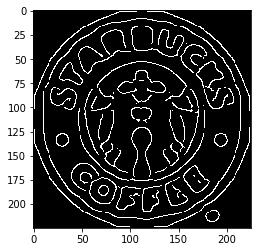

In [23]:
im_canny = feature.canny(im, 4) # -> Canny
plt.imshow(im_canny,cmap='gray')
plt.show()

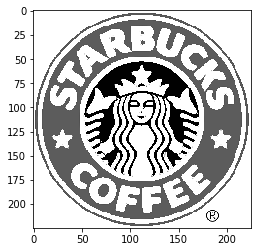

In [24]:
#Optional
im = io.imread('images/logo.png')
im_canny = canny(im)

im_superimpose = im.copy()
im_superimpose = rgb2gray(im_superimpose)
contours = im_canny.copy()
contours = img_as_float(contours)

mask = contours>0

im_superimpose[mask] = contours[mask]

plt.imshow(im_superimpose,cmap='gray',vmin=0,vmax=1)
plt.show()

b)	Repeate the experiment with other images, you can use the ones included in the folder **images**. Comment if the parameters need to be changed for the different images.

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

In [25]:
"""
In this function we want to compact the process of using 4 tecniques of contour extraction and also display
the images 

:param image: image we want to apply the filters
:param sigma_canny: the sigma of the canny function
"""
def extraction_contours_tecniques(image, sigma_canny=0):
    #We need the grayscale image...
    image_gray = rgb2gray(image)

    #Using all the different contour extractions...
    #In this case we will use the library provided to extract the contours
    im_roberts = filters.roberts(image_gray) # -> Roberts
    im_prewitt = filters.prewitt(image_gray) # -> Prewitt
    im_sobel = filters.sobel(image_gray) # -> Sobel
    im_canny = feature.canny(image_gray, sigma_canny) # -> Canny

    #Make and show the subplot
    plotter(images=[im_roberts,im_prewitt,im_sobel,im_canny],\
            titles=["Robert technique","Prewitt technique","Sobel technique","Canny technique"],\
           gray=[True,True,True,True],rows=2,cols=2)

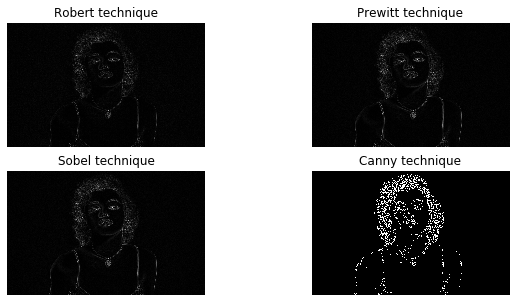

   --------------------------------------------------------------------------------------------------------


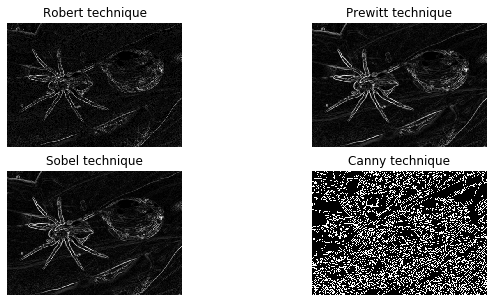

In [26]:
#We will choose 2 different images...
monroe = io.imread('images/monro2.jpg')
spyder = io.imread('images/spider.gif')

extraction_contours_tecniques(monroe)
print("   --------------------------------------------------------------------------------------------------------")
extraction_contours_tecniques(spyder)

## Answering the questions

As we can see, when we are using canny filter on an image with a lot of details we can say that if the sigma is greater than 0 the image results more perceptible.

Now we want to check what happens if we smooth previously the image. We think that if we smooth an image the contours will be difficult to perceive. Let's make a trial:

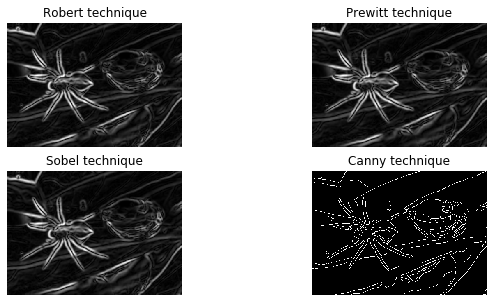

In [27]:
#We will use a gaussian filter with sigma equals to 2 to smooth the image
gray_spyder = rgb2gray(spyder)
sigma_2_spyder = filters.gaussian(gray_spyder, 2)
extraction_contours_tecniques(sigma_2_spyder)

As we thought the contours are less marked than before. However, if we smooth previously the image in some cases will be useful. If we look at canny image, the image is cleaner than before.

As we saw at class, the main limitations are when we have multiple figures that are not easily distinguishable or when are images with some shadows etc.

d) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


### 2.4 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images, compute the hybrid image and visualize it.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

Apply fspecial('gaussian,hsize,sigma') with the formula hsize=4*sigma+1. What does hsize mean?

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

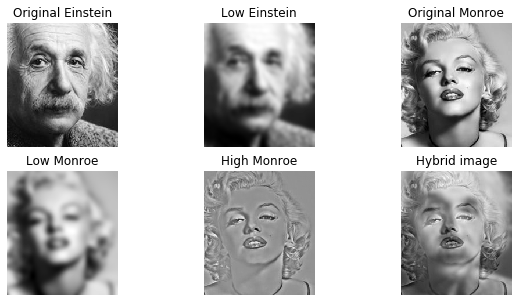

In [28]:
#Load images
eins = io.imread('images/Einstein.jpg')
monr = io.imread('images/monroe.jpg')

eins = img_as_float(eins)
monr = img_as_float(monr)

#Apply the low pass filters
eins_low = filters.gaussian(eins,3)
monr_low = filters.gaussian(monr,4)
monr_high = monr-monr_low           #To get the high values of the image we make the difference with the smoothed one

hybrid = eins_low+monr_high
hybrid = img_as_float(hybrid)

plotter(images=[eins,eins_low,monr,monr_low,monr_high, hybrid],\
        titles=["Original Einstein", "Low Einstein", "Original Monroe", "Low Monroe", "High Monroe", "Hybrid image"],\
        gray=[True, True, True, True, True, True],rows=2,cols=3)

b) Combine both hybrid images and visualize them. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. Additionally, rescale the image to different size and comment the results. Present the different visualizations of the experiment performed.

Optional : compute hybrid images from other images. Apply it over color images.

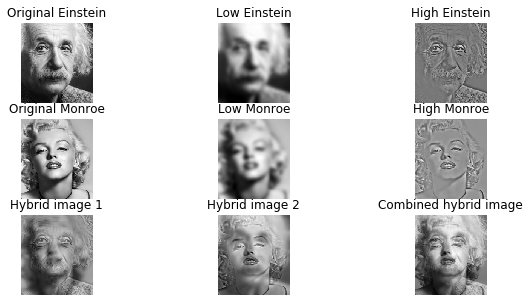

Rescale with Einstein as High and Monroe as Low


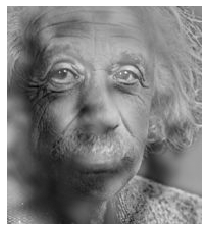

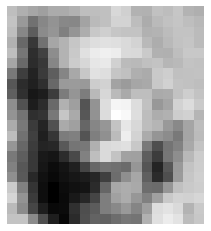

Rescale with Einstein as Low and Monroe as High


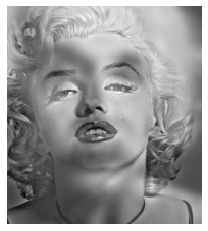

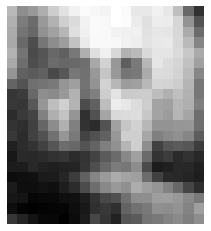

In [29]:
eins = io.imread('images/Einstein.jpg')
monr = io.imread('images/monroe.jpg')

eins = img_as_float(eins)
monr = img_as_float(monr)

eins_low = filters.gaussian(eins, 4)
eins_high = eins-eins_low

monr_low = filters.gaussian(monr, 4)
monr_high = monr-monr_low

hybrid1 = img_as_float(eins_high+monr_low)
hybrid2 = img_as_float(eins_low+monr_high)

both_hybrid = img_as_float(hybrid1+hybrid2)

plotter(images=[eins,eins_low, eins_high, monr,monr_low,monr_high, hybrid1,hybrid2, both_hybrid],\
        titles=["Original Einstein", "Low Einstein", "High Einstein", "Original Monroe", "Low Monroe", "High Monroe", "Hybrid image 1", "Hybrid image 2", "Combined hybrid image"],\
        gray=[True,True, True, True, True, True, True, True,True],rows=3,cols=3)

print("Rescale with Einstein as High and Monroe as Low")
plt.imshow(hybrid1,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(transform.rescale(hybrid1,0.1),cmap='gray')
plt.axis('off')
plt.show()

print("Rescale with Einstein as Low and Monroe as High")
plt.imshow(hybrid2,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(transform.rescale(hybrid2,0.1),cmap='gray')
plt.axis('off')
plt.show()


## Answering the questions

If we want to see Monroe in a short distance we should use the high values of her, but if we want to see her in a long distance we should use the lows one

## 2.5 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg



<IPython.core.display.Javascript object>


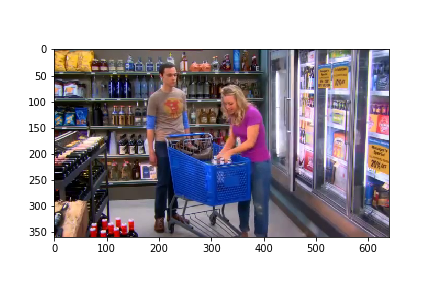

<IPython.core.display.Javascript object>


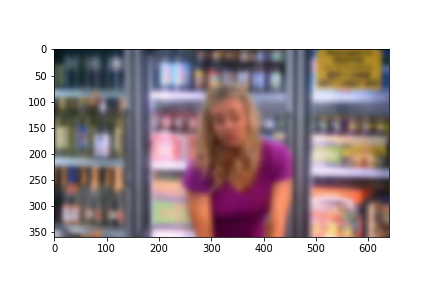

In [30]:
from matplotlib.animation import FuncAnimation

#if i use %matplotlib nbagg the cell crushes, using this the kernel automatically change to nbagg for some reason and it works
%matplotlib notebook 
%matplotlib notebook 

coll = io.ImageCollection('images/bigbangcollection/frame*.png')

coll_smoothed = [filters.gaussian(im,5,multichannel=True) for im in coll] #we smooth all the images

fig, ax = plt.subplots()
im = ax.imshow(coll[0])

def update(frame):            #the FuncAnimation needs a function in order to change the image
    im.set_data(coll[frame])
    return im,

ani = FuncAnimation(fig, update, frames=len(coll),interval=1,repeat=True)


fig_smoothed, ax_smoothed = plt.subplots()
im_smoothed = ax_smoothed.imshow(coll_smoothed[0])

def update_smoothed(frame):
    im_smoothed.set_data(coll_smoothed[frame])
    return im_smoothed,

ani_smoothed = FuncAnimation(fig_smoothed, update_smoothed, frames=len(coll),interval=1,repeat=True)

## Delivery

Compressed file **P2_Student1_Student2.zip** that includes:
- The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P2.zip.

**Deadline (Campus Virtual): October 15, 11:00 p.m.** 
